In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import sklearn
from sklearn.model_selection import train_test_split

In [81]:
df = pd.read_excel('MateriasPrimasConsolidado.xlsx', sheet_name='MateriasPrimasConsolidado', header=0, index_col=0)
df = df.dropna(axis=0, how='any')
df = df.dropna(axis=1, how='any')
df = df.drop(axis=1, labels=['Local_Timestamp','TimeStampDb','Partida','Solicitud','Valor_SP_Final','SP_Activo_Final','MateriaPrima','Equipo'])
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'], dayfirst=True)
df.set_index('Time_Stamp', inplace=True)
df.head()



C:\Users\ACER\AppData\Local\Temp\ipykernel_28244\2299251795.py:5: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S.%f format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'], dayfirst=True)


,PV_Final
Time_Stamp,
2024-11-28 00:33:00,1564.600590
2024-11-28 00:34:00,199.658432
2024-11-28 01:25:00,9.950685
2024-11-28 01:27:00,250.885925
2024-11-28 01:44:00,99.933740


In [82]:
df.tail()

,PV_Final
Time_Stamp,
2025-04-29 08:25:00,13.970554
2025-04-29 09:46:00,119.028374
2025-04-29 09:52:00,4780.677000
2025-04-29 10:11:00,502.702148
2025-04-29 10:30:00,270.217072


<Axes: xlabel='Time_Stamp'>

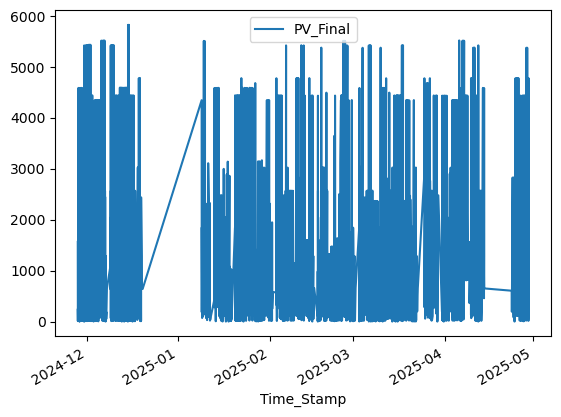

In [83]:
df.plot()

<Axes: xlabel='Time_Stamp'>

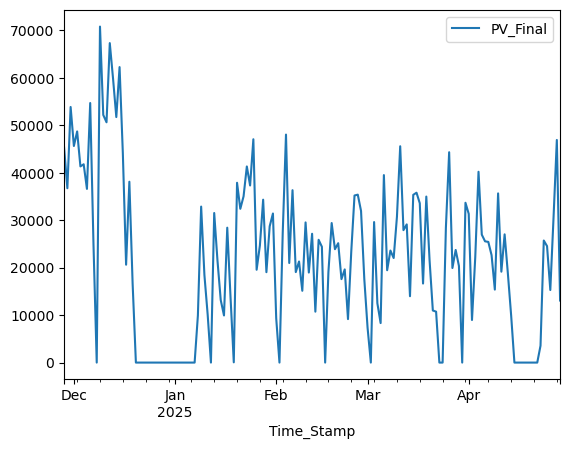

In [84]:
# Agrupar por semana y calcular la suma de una columna
df_dia = df.resample('D').sum()
df_dia.plot()

In [85]:
df_dia.head()

,PV_Final
Time_Stamp,
2024-11-28,45326.884966
2024-11-29,36743.113796
2024-11-30,53868.828773
2024-12-01,45649.366172
2024-12-02,48712.132305


In [86]:
df_dia.tail()

,PV_Final
Time_Stamp,
2025-04-25,24546.038515
2025-04-26,15294.304765
2025-04-27,30727.267489
2025-04-28,46916.597525
2025-04-29,13077.444509


In [87]:
df.count()

PV_Final    3109
dtype: int64

In [88]:
df_dia.count()

PV_Final    153
dtype: int64

In [89]:
retardo = 10
for i in range(1, retardo+1):
    df_dia['PV_Final-'+str(i)] = df_dia['PV_Final'].shift(i)
df_dia.dropna(inplace=True)
df_dia.head()

,PV_Final,PV_Final-1,PV_Final-2,PV_Final-3,PV_Final-4,PV_Final-5,PV_Final-6,PV_Final-7,PV_Final-8,PV_Final-9,PV_Final-10
Time_Stamp,,,,,,,,,,,
2024-12-08,0.000000,25037.904327,54701.582421,36603.260904,41793.329006,41345.731658,48712.132305,45649.366172,53868.828773,36743.113796,45326.884966
2024-12-09,70812.816218,0.000000,25037.904327,54701.582421,36603.260904,41793.329006,41345.731658,48712.132305,45649.366172,53868.828773,36743.113796
2024-12-10,52197.367577,70812.816218,0.000000,25037.904327,54701.582421,36603.260904,41793.329006,41345.731658,48712.132305,45649.366172,53868.828773
2024-12-11,50643.087150,52197.367577,70812.816218,0.000000,25037.904327,54701.582421,36603.260904,41793.329006,41345.731658,48712.132305,45649.366172
2024-12-12,67331.542463,50643.087150,52197.367577,70812.816218,0.000000,25037.904327,54701.582421,36603.260904,41793.329006,41345.731658,48712.132305


In [90]:
df_dia['dia_semana'] = df_dia.index.weekday
df_dia['mes'] = df_dia.index.month
df_dia['año'] = df_dia.index.year
df_dia.head()

,PV_Final,PV_Final-1,PV_Final-2,PV_Final-3,PV_Final-4,PV_Final-5,PV_Final-6,PV_Final-7,PV_Final-8,PV_Final-9,PV_Final-10,dia_semana,mes,año
Time_Stamp,,,,,,,,,,,,,,
2024-12-08,0.000000,25037.904327,54701.582421,36603.260904,41793.329006,41345.731658,48712.132305,45649.366172,53868.828773,36743.113796,45326.884966,6,12,2024
2024-12-09,70812.816218,0.000000,25037.904327,54701.582421,36603.260904,41793.329006,41345.731658,48712.132305,45649.366172,53868.828773,36743.113796,0,12,2024
2024-12-10,52197.367577,70812.816218,0.000000,25037.904327,54701.582421,36603.260904,41793.329006,41345.731658,48712.132305,45649.366172,53868.828773,1,12,2024
2024-12-11,50643.087150,52197.367577,70812.816218,0.000000,25037.904327,54701.582421,36603.260904,41793.329006,41345.731658,48712.132305,45649.366172,2,12,2024
2024-12-12,67331.542463,50643.087150,52197.367577,70812.816218,0.000000,25037.904327,54701.582421,36603.260904,41793.329006,41345.731658,48712.132305,3,12,2024


In [91]:
X = df_dia.drop('PV_Final', axis=1)
y = df_dia['PV_Final']
X_train = X.iloc[:-30]
X_test = X.iloc[-30:]
y_train = y.iloc[:-30]
y_test = y.iloc[-30:]

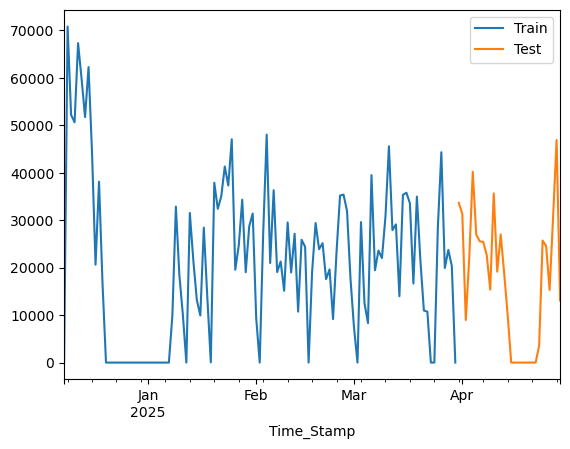

In [92]:
y_train.plot(label='Train')
y_test.plot(label='Test')
plt.legend()

In [93]:
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
train_score = mean_absolute_percentage_error(y_train, model.predict(X_train))
test_score = mean_absolute_percentage_error(y_test, model.predict(X_test))
print(f'Train score: {train_score:.4f}')
print(f'Test score: {test_score:.4f}')

Train score: 197960392883710144.0000
Test score: 12842773073770909696.0000
